Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [m]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 35 seconds.


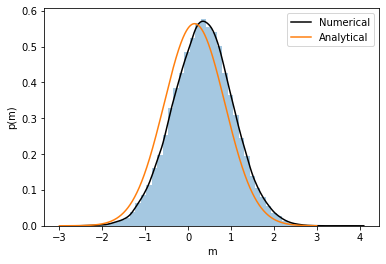

In [3]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import numpy as np
from scipy import stats
import math

ss = np.linspace(-3,3,1000)
with pm.Model():
    m = pm.Normal('m',mu =0 ,sigma=1) # m = prior
    obs = pm.Lognormal('obs',mu=m,sigma=1,observed = 2) # observed = x
    trace = pm.sample(20000)
tracee = trace['m']
analytical = stats.norm.pdf(ss,loc = math.log(2,10)/2,scale = 0.5**0.5) # loc = mu/ scale = sigma/ log's default lower value
# is e
sns.distplot(tracee,kde_kws={'color':'k'})
plt.plot(ss,analytical)
plt.xlabel('m')
plt.ylabel('p(m)')
plt.legend(['Numerical','Analytical'])
plt.show()